# Import libraries

In [ ]:
import os
from os import path, getcwd, chdir
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

In [ ]:
def plot_series(time, series, format="-", start = 0, end = None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("time")
  plt.ylabel("value")
  plt.grid(True)

# Data
## Looking into raw datasets

In [ ]:
file_path = '/content/drive/MyDrive/motion_dataset/'
train_path = file_path + 'train_dataset/'
test_path = file_path + 'test_dataset/'

In [ ]:
data_list = ['accx', 'accy', 'accz', 'gyrox', 'gyroy', 'gyroz']
# accx-> type(accx) : numpy.ndarray
accx = np.loadtxt(train_path+'acc_X.txt')
accy = np.loadtxt(train_path+'acc_Y.txt')
accz = np.loadtxt(train_path+'acc_Z.txt')
gyrox = np.loadtxt(train_path+'gyro_X.txt')
gyroy = np.loadtxt(train_path+'gyro_Y.txt')
gyroz = np.loadtxt(train_path+'gyro_Z.txt')
answers = np.loadtxt(train_path+'Answer.txt')

In [ ]:
# 나중에 [getattr(x, 'flatten')() for x in numpy_lists] OR map(np.ravel, [data list])

print(accx.shape)
print(accy.shape)
print(accz.shape)
print(gyrox.shape)
print(gyroy.shape)
print(gyroz.shape)

my_data = [accx, accy, accz, gyrox, gyroy, gyroz]

In [ ]:
prop = 0.7
train_prop=int(accx.shape[0]*prop)
print('The number of train data :' , train_prop)
print('The number of test data :', accx.shape[0]-train_prop)
len_train = train_prop

In [ ]:
# 하나의 배열로 합치고 (n,6) 모양으로 정리하기 = dataset
my_data=map(np.ravel, my_data)
print(f"the original my_data didnt change. the shape of accx : {accx.shape}")
dataset = np.column_stack(my_data)
print(dataset)
print(dataset.shape)

In [ ]:
dataset = dataset.reshape((18516,200,6))
print(dataset.shape)

### 참고: list들을 일괄적으로 처리하기 : np.ravel, getattr(x, 'method')() for x in datalist 


* 1. 안녕하세요님 
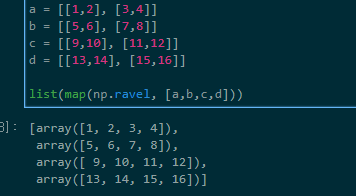
* 2. 라면먹는제이지님

In [ ]:
# getattr(x, 'method')() 사용하기
getattr(x, 'flatten')() for x in my_data
print([x.shape for x in my_data])

# 라면먹는 제이지님 샘플
class MyDataStructures(): 
        
    import numpy as np 
 
    def __init__(self, data): 
        if isinstance(data, np.ndarray): 
            self.data = data 
        else: 
            self.data = np.array(data) 
     
    def flatten(self): 
        return self.data.flatten() 
     
    def reverse_flatten(self): 
        return self.flatten()[::-1] 
     
 
a = [[1,2], [3,4]] 
b = [[5,6], [7,8]] 
c = [[9,10], [11,12]] 
d = [[13,14], [15,16]] 
 
my_data = [MyDataStructures(a),  
           MyDataStructures(b),  
           MyDataStructures(c),  
           MyDataStructures(d)] 
 
for method in ['flatten', 'reverse_flatten']: 
    print(f'{method} 처리결과 : ') 
    print([getattr(x, method)() for x in my_data])

## Spliting Train set & Test Set 



In [ ]:
print(answers, answers.shape)
answers= answers.astype(int)
answers=answers.reshape((18516,1))

In [ ]:
# using sklearn.model_selection
trainx, testx, trainy, testy = train_test_split(dataset,
                                                answers,
                                                test_size=0.3,
                                                shuffle = True,
                                                random_state = 1004)

print('X_train shape:', trainx.shape)
print('X_test shape:', testx.shape)
print('y_train shape:', trainy.shape)
print('y_test shape:', testy.shape)

# Model

In [ ]:
def train_motion(trainx, trainy):

  class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if logs.get('acc') > 0.950:
        print("\nReached 95.0% accuracy so canceling training.")

  callbacks = myCallback()

  model = tf.keras.models.Sequential([
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 200, return_sequences = True), input_shape = (200,6)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 200, return_sequences = False)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64),
      tf.keras.layers.Dense(1, activation = 'softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics =['acc'])
  history = model.fit(trainx, trainy,
                      #validation_data = (testx, testy),
                      epochs = 10,
                      callbacks=[callbacks])
  return history.epoch, history.history['acc'][-1]

In [ ]:
trainx.shape

In [ ]:
train_motion(trainx, trainy)

In [ ]:
model.evaluate(testx, testy)

In [ ]:
tf.keras.backend.clear_session()